#### Описание данных
##### Резюме общего социального обследования, 1972-2012 годы

С 1972 года Общее социальное исследование (GSS) отслеживает изменения в обществе и изучает растущую сложность американского общества. GSS стремится собирать данные о современном американском обществе для мониторинга и объяснения тенденций и констант в подходах, поведении и атрибутах; изучить структуру и функционирование общества в целом, а также роль соответствующих подгрупп; сравнить Соединенные Штаты с другими обществами, с тем чтобы поставить американское общество в сравнительную перспективу и разработать межнациональные модели человеческого общества; и сделать высококачественные данные доступными для ученых, студентов, политиков и других лиц с минимальными затратами и ожиданиями.

Вопросы GSS охватывают широкий круг вопросов, включая приоритеты национальных расходов, использование марихуаны, преступность и наказание, расовые отношения, качество жизни, доверие к учреждениям и сексуальное поведение.

Данные состоятся из много переменных, о которых можно больше узнать в файле [gss.html](gss.html)

##### Оригинал на английском языке:
##### Abstract for the General Social Survey Cumulative File, 1972-2012

[Excerpted from the GSS project description]

Since 1972, the General Social Survey (GSS) has been monitoring societal change and studying the growing complexity of American society. The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [127]:
data = pd.read_csv('./gss.csv', engine = 'python')
# Сразу бросим порядковые числа в первом столбце
data = data.drop(data.columns[0], axis=1)
orig_data = data

In [5]:
type(data)

pandas.core.frame.DataFrame

Посмотрим как выглядят данные:

In [16]:
data.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.tail()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
57056,57057,2012,61.0,Female,Other,Not Hispanic,NaN,16.0,12.0,12.0,...,Few Times A Week,3.0,No,Yes,No,Yes,Agree With Both,Govt Does Too Much,Govt Should Help,No Special Treatment
57057,57058,2012,53.0,Female,Other,Not Hispanic,NaN,13.0,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,Agree With Both,Govt Should Help,No Special Treatment
57058,57059,2012,48.0,Male,White,"Mexican, Mexican American, Chicano/A",NaN,13.0,12.0,12.0,...,Less Than Once Wk,4.0,No,No,No,Yes,NaN,NaN,NaN,NaN
57059,57060,2012,37.0,Female,Other,Not Hispanic,NaN,12.0,12.0,NaN,...,Never,4.0,Yes,No,Yes,No,Agree With Both,NaN,Agree With Both,NaN
57060,57061,2012,22.0,Male,Other,Not Hispanic,NaN,12.0,10.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,NaN,NaN


In [18]:
print(data.shape)
print(data.columns)

(57061, 114)
Index(['caseid', 'year', 'age', 'sex', 'race', 'hispanic', 'uscitzn', 'educ',
       'paeduc', 'maeduc',
       ...
       'news', 'tvhours', 'racdif1', 'racdif2', 'racdif3', 'racdif4',
       'helppoor', 'helpnot', 'helpsick', 'helpblk'],
      dtype='object', length=114)


In [19]:
data.index

RangeIndex(start=0, stop=57061, step=1)

In [20]:
data.at[2, 'degree']

'High School'

In [21]:
data['degree']

0              Bachelor
1        Lt High School
2           High School
3              Bachelor
4           High School
5           High School
6           High School
7              Bachelor
8           High School
9           High School
10          High School
11       Lt High School
12       Lt High School
13       Lt High School
14       Lt High School
15          High School
16          High School
17       Lt High School
18             Bachelor
19          High School
20          High School
21          High School
22          High School
23          High School
24             Bachelor
25          High School
26          High School
27          High School
28          High School
29       Lt High School
              ...      
57031       High School
57032       High School
57033       High School
57034       High School
57035       High School
57036          Bachelor
57037          Bachelor
57038          Bachelor
57039    Junior College
57040    Junior College
57041    Junior 

In [22]:
data['degree'][3]

'Bachelor'

In [23]:
data['educ'].dtype.name

'float64'

In [24]:
type(data['educ'][3])

numpy.float64

In [15]:
type(data['degree'])

pandas.core.series.Series

In [49]:
data[['degree', 'educ']].head()

,degree,educ
0,Bachelor,16.0
1,Lt High School,10.0
2,High School,12.0
3,Bachelor,17.0
4,High School,12.0


Какое отношение между категориальными и числовыми признаками обозначающими образование?

In [92]:
for name in data['degree'][data['degree'].notna()].unique():
    print(name, (data['educ'][data['degree'] == name]).mean())

Bachelor 16.33975
Lt High School 8.814093845630738
High School 12.610750410060142
Graduate 18.378364389233955
Junior College 14.406066536203522


##### Задача

Попробуем классифицировать данные в два класса, те кто зарабатывает меньше 50000 долларов в год, и те кто зарабатывает больше. `coninc` обозначает доходы всей семьи в год.

Бросим лишние столбцы.

In [93]:
data = orig_data
data = data.drop(['caseid', 'year'], axis=1)
data = data.drop(['hispanic', 'degree', 'uscitzn', 'sei', 'income06', 'vetyears', 'region'], axis=1)
data = data.drop(['natspac', 'natenvir', 'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms', 'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark'], axis=1)
data = data.drop(['confinan', 'conbus', 'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci', 'conlegis', 'conarmy'], axis=1)
data = data.drop(['joblose', 'jobfind', 'satjob', 'richwork', 'jobinc', 'jobsec', 'jobhour', 'jobpromo', 'jobmeans', 'satfin', 'finalter'], axis=1)
data = data.drop(['finrela', 'unemp', 'govaid', 'getaid', 'union', 'getahead', 'parsol', 'kidssol'], axis=1)
data = data.drop(['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany',], axis=1)
data = data.drop(['pillok', 'sexeduc', 'divlaw', 'premarsx', 'teensex', 'xmarsex', 'homosex'], axis=1)
data = data.drop(['relig', 'attend'], axis=1)
data = data.drop(['suicide1', 'suicide2', 'suicide3', 'suicide4'], axis=1)
data = data.drop(['fear', 'owngun', 'pistol', 'shotgun', 'rifle'], axis=1)
#data = data.drop(['tvhours', 'news'], axis=1)
data = data.drop(['racdif1', 'racdif2', 'racdif3', 'racdif4'], axis=1)
data = data.drop(['helppoor', 'helpnot', 'helpsick', 'helpblk'], axis=1)

Как теперь выглядят наши данные:

In [13]:
data.head()

,age,sex,race,educ,paeduc,maeduc,speduc,wrkstat,wrkslf,marital,...,born,parborn,granborn,coninc,partyid,polviews,class,rank,news,tvhours
0,23.0,Female,White,16.0,10.0,NaN,NaN,Working Fulltime,Someone Else,Never Married,...,NaN,NaN,NaN,25926.0,"Ind,Near Dem",NaN,Middle Class,NaN,Everyday,NaN
1,70.0,Male,White,10.0,8.0,8.0,12.0,Retired,Someone Else,Married,...,NaN,NaN,NaN,33333.0,Not Str Democrat,NaN,Middle Class,NaN,Everyday,NaN
2,48.0,Female,White,12.0,8.0,8.0,11.0,Working Parttime,Someone Else,Married,...,NaN,NaN,NaN,33333.0,Independent,NaN,Working Class,NaN,Everyday,NaN
3,27.0,Female,White,17.0,16.0,12.0,20.0,Working Fulltime,Someone Else,Married,...,NaN,NaN,NaN,41667.0,Not Str Democrat,NaN,Middle Class,NaN,Once A Week,NaN
4,61.0,Female,White,12.0,8.0,8.0,12.0,Keeping House,Someone Else,Married,...,NaN,NaN,NaN,69444.0,Strong Democrat,NaN,Working Class,NaN,Everyday,NaN


In [14]:
data.corr()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
age,1.000000,-0.204311,-0.312058,-0.324715,-0.170690,0.126142,0.360464,0.097563,0.109490,-0.051520,-0.046362,0.094059
educ,-0.204311,1.000000,0.490471,0.475221,0.632224,-0.308237,-0.251144,0.340486,0.025626,0.397028,-0.231842,-0.228821
paeduc,-0.312058,0.490471,1.000000,0.686664,0.447697,-0.306335,-0.271118,0.184232,-0.080621,0.236245,-0.185808,-0.133396
maeduc,-0.324715,0.475221,0.686664,1.000000,0.429771,-0.303662,-0.255953,0.134210,-0.178196,0.222408,-0.166124,-0.125998
speduc,-0.170690,0.632224,0.447697,0.429771,1.000000,-0.266769,-0.208067,0.303857,0.007972,0.454761,-0.251044,-0.191604
sibs,0.126142,-0.308237,-0.306335,-0.303662,-0.266769,1.000000,0.196186,-0.139089,0.008558,-0.177086,0.114103,0.072359
childs,0.360464,-0.251144,-0.271118,-0.255953,-0.208067,0.196186,1.000000,-0.280569,0.016764,-0.027291,0.043152,0.053542
agekdbrn,0.097563,0.340486,0.184232,0.134210,0.303857,-0.139089,-0.280569,1.000000,0.139718,0.311938,-0.136056,-0.154635
granborn,0.109490,0.025626,-0.080621,-0.178196,0.007972,0.008558,0.016764,0.139718,1.000000,0.067567,-0.027140,-0.058625
coninc,-0.051520,0.397028,0.236245,0.222408,0.454761,-0.177086,-0.027291,0.311938,0.067567,1.000000,-0.263406,-0.227127


Видно что `coninc` более всего коррелирует с уровнем образования мужа или жены, но в общем нет много корреляции.

Построим теперь матрицу рассеивания, включая не все столбцы (долго этого ждать, и невозможно всё нарисовать), а только те которые интересные и хорошо коррелируют с `coninc`.

/Users/marko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


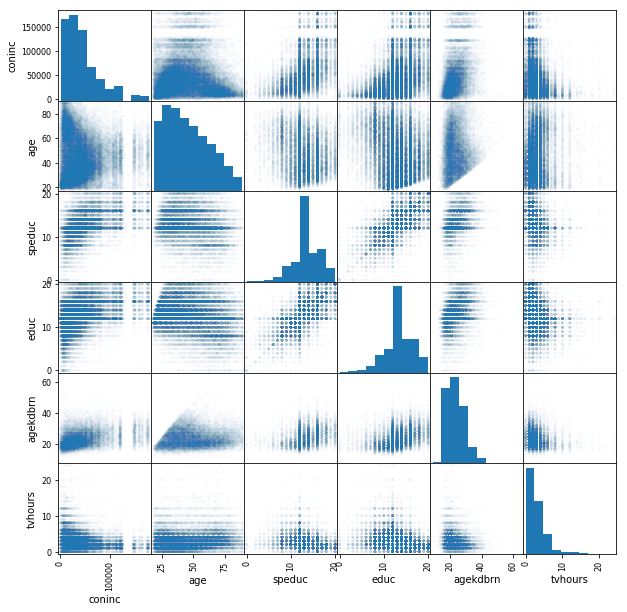

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[["coninc", "age", "speduc", "educ", "agekdbrn", "tvhours"]], alpha = .01, figsize = (10, 10))
pass

Посмотрим статистические данные:

In [67]:
data.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,rank,tvhours
count,56859.000000,56897.000000,40173.000000,46929.000000,29626.000000,55382.000000,56880.000000,18119.000000,44996.000000,9854.000000,33855.000000
mean,45.697955,12.753590,10.554004,10.713844,12.780328,3.940053,1.952848,23.787130,1.154547,4.772681,2.970699
std,17.472112,3.181642,4.349151,3.744795,3.128766,3.190929,1.791539,5.432127,1.604481,1.855722,2.353317
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000
25%,31.000000,12.000000,8.000000,8.000000,12.000000,2.000000,0.000000,20.000000,0.000000,4.000000,2.000000
50%,43.000000,12.000000,12.000000,12.000000,12.000000,3.000000,2.000000,23.000000,0.000000,5.000000,2.000000
75%,59.000000,15.000000,13.000000,12.000000,15.000000,5.000000,3.000000,27.000000,2.000000,6.000000,4.000000
max,89.000000,20.000000,20.000000,20.000000,20.000000,68.000000,8.000000,65.000000,4.000000,10.000000,24.000000


Посмотрим подробнее, график зависимости доходов от уровня образования мужа или жены.

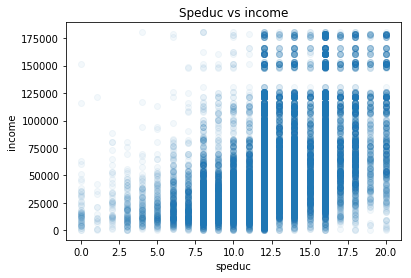

In [23]:
plt.plot(data['speduc'], data['coninc'], 'o', alpha = 0.05)
plt.xlabel('speduc')
plt.ylabel('income')
plt.title('Speduc vs income')
pass

Видимо, корреляция есть, но много рассеяния.

Теперь создадим новый категориальный признак на основании `coninc`, который и будем угадать при обучении.

In [24]:
data['coninc'].describe()

count     51232.000000
mean      44503.038316
std       35936.012301
min         383.000000
25%       18445.000000
50%       35602.000000
75%       59542.000000
max      180386.000000
Name: coninc, dtype: float64

In [130]:
def group_inc(row):
    if row['coninc'] >= 50000:
        return 1
    else:
        return 0

data['class'] = data.apply(group_inc, axis=1)

Узнаем что-нибудь о нашем новом признаке:

In [38]:
data['class'].describe()

count    57061.000000
mean         0.298540
std          0.457622
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: class, dtype: float64

(array([40026., 17035.]),
 array([-0.65237328,  0.44023229,  1.53283787]),
 <a list of 2 Patch objects>)

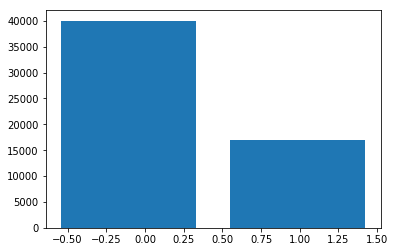

In [175]:
plt.hist(data['class'], rwidth=0.8, bins=2)

Первого больше, но и второго достаточно.

Мне интересно как много смотрят телевизор в зависимости от образования, для каждого класса: красные точки - доходы больше 50000 долларов в год.

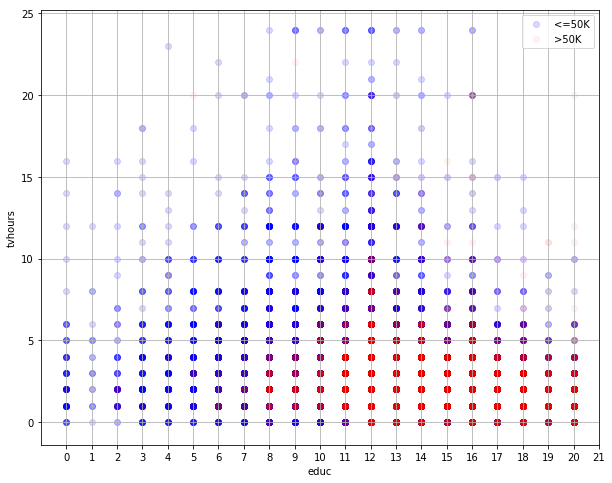

In [41]:
plt.figure(figsize = (10, 8))

plt.scatter(data["educ"][data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data["educ"][data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Если хотим можем ёще и рассеять эти точки чтобы увидеть те которые перекрываются.

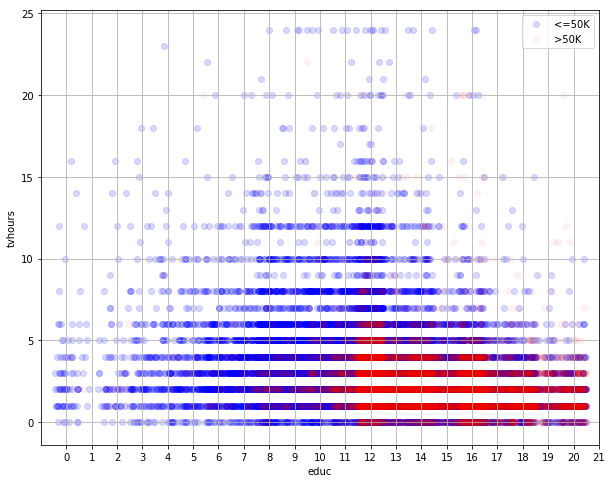

In [40]:
np.random.seed(0)
educ_rnd = data['educ'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(educ_rnd[data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(educ_rnd[data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Чтобы понять это полностью, давайте посмотрим зависимость `tvhours` от возраста.

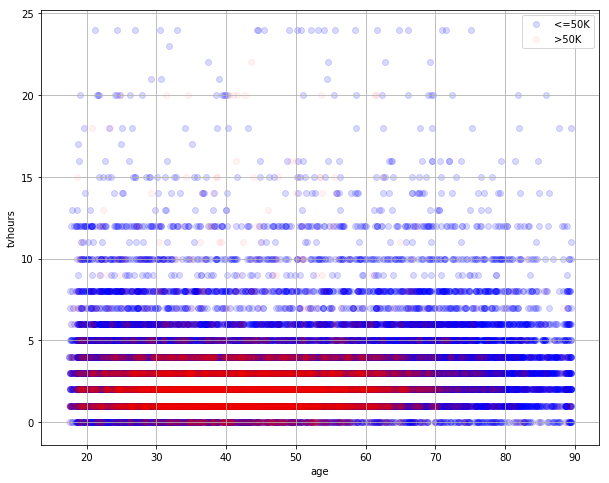

In [32]:
np.random.seed(0)
age_rnd = data['age'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(age_rnd[data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(age_rnd[data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('age')
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Значит это не из-за возраста, это больше всего из-за образования.
Телевизор смотрят больше всех люди с законченным средним образованием, и больше те которые зарабатывают меньше.

Теперь посмотрим описание (статистические данные) категориальных и всех признаков.

In [42]:
data.describe(include = ['object'])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57047,53549,57041,30697,43739,47804,47766,56734,47876,35689
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28207,47352,30761,16815,21941,43705,39137,12040,18494,17023


In [43]:
data.describe(include = 'all')

,age,sex,race,educ,paeduc,maeduc,speduc,wrkstat,wrkslf,marital,...,born,parborn,granborn,coninc,partyid,polviews,class,rank,news,tvhours
count,56859.000000,57061,57061,56897.000000,40173.000000,46929.000000,29626.000000,57047,53549,57041,...,47804,47766,44996.000000,51232.000000,56734,47876,57061.000000,9854.000000,35689,33855.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,8,2,5,...,2,9,NaN,NaN,8,7,NaN,NaN,5,NaN
top,NaN,Female,White,NaN,NaN,NaN,NaN,Working Fulltime,Someone Else,Married,...,Yes,Both In U.S,NaN,NaN,Not Str Democrat,Moderate,NaN,NaN,Everyday,NaN
freq,NaN,31915,46350,NaN,NaN,NaN,NaN,28207,47352,30761,...,43705,39137,NaN,NaN,12040,18494,NaN,NaN,17023,NaN
mean,45.697955,NaN,NaN,12.753590,10.554004,10.713844,12.780328,NaN,NaN,NaN,...,NaN,NaN,1.154547,44503.038316,NaN,NaN,0.298540,4.772681,NaN,2.970699
std,17.472112,NaN,NaN,3.181642,4.349151,3.744795,3.128766,NaN,NaN,NaN,...,NaN,NaN,1.604481,35936.012301,NaN,NaN,0.457622,1.855722,NaN,2.353317
min,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,383.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,31.000000,NaN,NaN,12.000000,8.000000,8.000000,12.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,18445.000000,NaN,NaN,0.000000,4.000000,NaN,2.000000
50%,43.000000,NaN,NaN,12.000000,12.000000,12.000000,12.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,35602.000000,NaN,NaN,0.000000,5.000000,NaN,2.000000
75%,59.000000,NaN,NaN,15.000000,13.000000,12.000000,15.000000,NaN,NaN,NaN,...,NaN,NaN,2.000000,59542.000000,NaN,NaN,1.000000,6.000000,NaN,4.000000


Находим категориальные и числовые признаки:

In [131]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['sex', 'race', 'hispanic', 'uscitzn', 'degree', 'vetyears', 'wrkstat', 'wrkslf', 'marital', 'spwrksta', 'incom16', 'born', 'parborn', 'income06', 'region', 'partyid', 'polviews', 'relig', 'attend', 'natspac', 'natenvir', 'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms', 'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark', 'confinan', 'conbus', 'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci', 'conlegis', 'conarmy', 'joblose', 'jobfind', 'satjob', 'richwork', 'jobinc', 'jobsec', 'jobhour', 'jobpromo', 'jobmeans', 'satfin', 'finalter', 'finrela', 'unemp', 'govaid', 'getaid', 'union', 'getahead', 'parsol', 'kidssol', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany', 'pillok', 'sexeduc', 'divlaw', 'premarsx', 'teensex', 'xmarsex', 'homosex', 'suicide1', 'suicide2', 'suicide3', 'suicide4', 'fear', 'owngun', 'pistol', 'shotgun', 'rifle', 'news', 'racdif1', 'racdif2', 'racdif3', 

In [132]:
for c in categorical_columns:
    print(c, data[c].unique())
    print()

sex ['Female' 'Male']

race ['White' 'Black' 'Other']

hispanic [nan 'Not Hispanic' 'Puerto Rican' 'Mexican, Mexican American, Chicano/A'
 'Salvadorian' 'Peruvian' 'Filipino/A' 'Other, Not Specified' 'Spanish'
 'Dominican' 'Panamanian' 'Central American' 'Latin' 'Equadorian'
 'Latino/A' 'Columbian' 'South American' 'Cuban' 'Guatemalan' 'Venezuelan'
 'Latin American' 'Basque' 'Nicaraguan' 'Costa Rican' 'West Indian'
 'Hispanic' 'Honduran' 'Argentinian' 'Chilean']

uscitzn [nan 'A U.S. Citizen' 'Not A U.S. Citizen'
 'Born Outside Of The United States To Parents Who Were U.S Citizens At That Time (If Volunteered)'
 'A U.S. Citizen Born In Puerto Rico, The U.S. Virgin Islands, Or The Northern Marianas Islands']

degree ['Bachelor' 'Lt High School' 'High School' nan 'Graduate' 'Junior College']

vetyears [nan 'None' '2 To 4 Years' 'Less Than 2 Yrs' 'More Than 4 Yrs'
 'Some,Dk How Long']

wrkstat ['Working Fulltime' 'Retired' 'Working Parttime' 'Keeping House' 'School'
 'Unempl, Laid Off' 'T

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [135]:
data['class'].isna().sum()

0

Главное что нет пропущенных значений в столбце `class`

In [136]:
data[numerical_columns].median()

caseid      28531.0
year         1993.0
age            43.0
educ           12.0
paeduc         12.0
maeduc         12.0
speduc         12.0
sei            39.0
sibs            3.0
childs          2.0
agekdbrn       23.0
granborn        0.0
coninc      35602.0
class           0.0
rank            5.0
tvhours         2.0
dtype: float64

In [137]:
data[numerical_columns] = data[numerical_columns].fillna(data.median(axis = 0), axis = 0)

Проверим как обработаны пропущенные значения:

In [138]:
data[numerical_columns].count(axis = 0)

caseid      57061
year        57061
age         57061
educ        57061
paeduc      57061
maeduc      57061
speduc      57061
sei         57061
sibs        57061
childs      57061
agekdbrn    57061
granborn    57061
coninc      57061
class       57061
rank        57061
tvhours     57061
dtype: int64

In [139]:
data[categorical_columns].count(axis = 0)

sex         57061
race        57061
hispanic    18920
uscitzn       770
degree      56051
vetyears    21884
wrkstat     57047
wrkslf      53549
marital     57041
spwrksta    30697
incom16     43739
born        47804
parborn     47766
income06    10070
region      57061
partyid     56734
polviews    47876
relig       56828
attend      47092
natspac     31227
natenvir    31614
natheal     32081
natcity     29096
natcrime    31781
natdrug     31415
nateduc     32255
natrace     30309
natarms     31427
nataid      31506
natfare     31758
            ...  
abhlth      39384
abpoor      39028
abrape      38981
absingle    39020
abany       31807
pillok      20748
sexeduc     30680
divlaw      32684
premarsx    33548
teensex     21702
xmarsex     34019
homosex     32789
suicide1    28826
suicide2    29574
suicide3    29504
suicide4    29208
fear        34295
owngun      34459
pistol      34219
shotgun     34211
rifle       34211
news        35689
racdif1     24086
racdif2     24421
racdif3   

Осталось заполнить пропущенные категориальные значения наичаще повторяемыми.

In [101]:
data['wrkstat'].describe()

count                57047
unique                   8
top       Working Fulltime
freq                 28207
Name: wrkstat, dtype: object

In [129]:
type(data['wrkstat'].describe())

pandas.core.series.Series

In [130]:
data['wrkstat'].describe().top

'Working Fulltime'

In [41]:
#data['wrkstat'] = data['wrkstat'].fillna(data['wrkstat'].describe().top)

In [140]:
data.describe(include = [object])

,sex,race,hispanic,uscitzn,degree,vetyears,wrkstat,wrkslf,marital,spwrksta,...,rifle,news,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061,57061,18920,770,56051,21884,57047,53549,57041,30697,...,34211,35689,24086,24421,24459,23827,20166,19072,19327,19884
unique,2,3,28,4,5,5,8,2,5,8,...,3,5,2,2,2,2,3,3,3,3
top,Female,White,Not Hispanic,Not A U.S. Citizen,High School,None,Working Fulltime,Someone Else,Married,Working Fulltime,...,No,Everyday,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,31915,46350,16936,378,29287,18093,28207,47352,30761,16815,...,25580,17023,14456,20987,12454,12765,12273,10874,8903,8656


In [141]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

После обработки:

In [142]:
data.describe(include = [object])

,sex,race,hispanic,uscitzn,degree,vetyears,wrkstat,wrkslf,marital,spwrksta,...,rifle,news,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061,...,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061
unique,2,3,28,4,5,5,8,2,5,8,...,3,5,2,2,2,2,3,3,3,3
top,Female,White,Not Hispanic,Not A U.S. Citizen,High School,None,Working Fulltime,Someone Else,Married,Working Fulltime,...,No,Everyday,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,31915,46350,55077,56669,30297,53270,28221,50864,30781,43179,...,48430,38395,47431,53627,45056,45999,49168,48863,46637,45833


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [143]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'wrkslf', 'born', 'richwork', 'unemp', 'govaid', 'getaid', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany', 'suicide1', 'suicide2', 'suicide3', 'suicide4', 'fear', 'racdif1', 'racdif2', 'racdif3', 'racdif4'] ['race', 'hispanic', 'uscitzn', 'degree', 'vetyears', 'wrkstat', 'marital', 'spwrksta', 'incom16', 'parborn', 'income06', 'region', 'partyid', 'polviews', 'relig', 'attend', 'natspac', 'natenvir', 'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms', 'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark', 'confinan', 'conbus', 'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci', 'conlegis', 'conarmy', 'joblose', 'jobfind', 'satjob', 'jobinc', 'jobsec', 'jobhour', 'jobpromo', 'jobmeans', 'satfin', 'finalter', 'finrela', 'union', 'getahead', 'parsol', 'kidssol', 'pillok', 'sexeduc', 'divlaw', 'premarsx', 'teensex', 'xmarsex', 'homosex', 'owngun', 'pistol', 'shotgun', 'rifl

In [144]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [145]:
for name in binary_columns:
    unq = data[name].unique()
    print(unq)
    data.at[data[name] == unq[0], name] = 0
    data.at[data[name] == unq[1], name] = 1

data['sex'].describe()

['Female' 'Male']
['Someone Else' 'Self-Employed']
['Yes' 'No']
['Continue Working' 'Stop Working']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


count    57061.000000
mean         0.440686
std          0.496474
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

### К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 3 различных значений: 

In [146]:
data['race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

Заменим признак `race` 3 признаками: `race_White`, `race_Black`, `race_Other`.

 - Если признак `race` принимает значение `White`, то признак `race_White` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Black`, то признак `race_Black` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [147]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['race_Black', 'race_Other', 'race_White', 'hispanic_Argentinian',
       'hispanic_Basque', 'hispanic_Central American', 'hispanic_Chilean',
       'hispanic_Columbian', 'hispanic_Costa Rican', 'hispanic_Cuban',
       ...
       'helppoor_People Help Selves', 'helpnot_Agree With Both',
       'helpnot_Govt Do More', 'helpnot_Govt Does Too Much',
       'helpsick_Agree With Both', 'helpsick_Govt Should Help',
       'helpsick_People Help Selves', 'helpblk_Agree With Both',
       'helpblk_Govt Help Blks', 'helpblk_No Special Treatment'],
      dtype='object', length=359)


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [148]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,class,rank,tvhours
count,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,28531.000000,1992.084261,45.688404,12.751424,10.981967,10.942220,12.405145,44.165367,3.912392,1.952998,23.249943,0.910429,43593.763113,0.298540,4.960744,2.575928
std,16472.236192,11.724820,17.441894,3.177322,3.708438,3.431464,2.287893,14.956667,3.147643,1.788697,3.082825,1.500760,34157.581193,0.457622,0.775909,1.874340
min,1.000000,1972.000000,18.000000,0.000000,0.000000,0.000000,0.000000,17.100000,0.000000,0.000000,9.000000,0.000000,383.000000,0.000000,1.000000,0.000000
25%,14266.000000,1983.000000,31.000000,12.000000,8.000000,9.000000,12.000000,38.400002,2.000000,0.000000,23.000000,0.000000,19933.000000,0.000000,5.000000,2.000000
50%,28531.000000,1993.000000,43.000000,12.000000,12.000000,12.000000,12.000000,39.000000,3.000000,2.000000,23.000000,0.000000,35602.000000,0.000000,5.000000,2.000000
75%,42796.000000,2002.000000,59.000000,15.000000,12.000000,12.000000,12.000000,45.400002,5.000000,3.000000,23.000000,2.000000,54289.000000,1.000000,5.000000,3.000000
max,57061.000000,2012.000000,89.000000,20.000000,20.000000,20.000000,20.000000,97.199997,68.000000,8.000000,65.000000,4.000000,180386.000000,1.000000,10.000000,24.000000


In [149]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [150]:
data_numerical.describe()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,class,rank,tvhours
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04
mean,2.288117e-17,5.571062e-14,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,2.951424e-13,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,4.657224e-15,1.107614e-14,-1.476717e-14,5.309354e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732005e+00,-1.712970e+00,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.809585e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-1.265042e+00,-6.523733e-01,-5.104653e+00,-1.374312e+00
25%,-8.660026e-01,-7.747889e-01,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-3.854712e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.926943e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
50%,0.000000e+00,7.810263e-02,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-3.453555e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-2.339675e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
75%,8.660026e-01,8.457050e-01,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,8.254748e-02,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,3.131146e-01,1.532838e+00,5.059389e-02,2.262517e-01
max,1.732005e+00,1.698597e+00,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,3.545886e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,4.004740e+00,1.532838e+00,6.494652e+00,1.143020e+01


## Соединяем все в одну таблицу

In [151]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(57061, 398)


In [152]:
data.describe()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,...,abany,suicide1,suicide2,suicide3,suicide4,fear,racdif1,racdif2,racdif3,racdif4
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,...,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,2.288117e-17,5.571062e-14,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,2.951424e-13,5.667253e-16,6.362887e-15,...,0.225846,0.226109,0.043410,0.044058,0.080247,0.245527,0.168767,0.060181,0.210389,0.193863
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.418142,0.418314,0.203779,0.205226,0.271678,0.430403,0.374549,0.237824,0.407588,0.395326
min,-1.732005e+00,-1.712970e+00,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.809585e+00,-1.242959e+00,-1.091855e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.660026e-01,-7.747889e-01,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-3.854712e-01,-6.075631e-01,-1.091855e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,7.810263e-02,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-3.453555e-01,-2.898651e-01,2.627741e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.660026e-01,8.457050e-01,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,8.254748e-02,3.455309e-01,5.853435e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.732005e+00,1.698597e+00,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,3.545886e+00,2.036050e+01,3.380674e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [153]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class'].astype(int)
feature_names = X.columns


In [154]:
type(feature_names)

pandas.core.indexes.base.Index

In [155]:
feature_names

Index(['caseid', 'year', 'age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sei',
       'sibs', 'childs',
       ...
       'abany', 'suicide1', 'suicide2', 'suicide3', 'suicide4', 'fear',
       'racdif1', 'racdif2', 'racdif3', 'racdif4'],
      dtype='object', length=397)

In [156]:
print(X.shape)
print(y.shape)
N, d = X.shape

(57061, 397)
(57061,)


In [119]:
type(X)

pandas.core.frame.DataFrame

In [120]:
type(y)

pandas.core.series.Series

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

39942 17119


In [158]:
N_train + N_test

57061

In [122]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: class, dtype: int64

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [160]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [161]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.11742025937609533 0.14352473859454407


In [162]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [163]:
err_test

0.14352473859454407

Ошибка на обучающей выборке 0.11, а ошибка на тестовой выборке 0.14. Это наверно можно улучшить подбирая другой параметр k, или другой алгоритм обучения.

In [164]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[11644   386]
 [ 2071  3018]]


In [166]:
confusion_matrix([0,1,0,1,0,1], [0,1,0,0,0,1])

array([[3, 0],
       [1, 2]])

Правильно предсказано 11644 принадлежащих классу зарабатывающих меньше 50000 в год (класс 0), и 3018 зарабатывающих больше (класс 1). 2071 случай когда предсказано класс 0, но эти люди зарабатывают больше, и 386 обратных случаев.

### Подбор параметров

Узнаём  для какого k, тестовая ошибка наименьшая. Построим график зависимости ошибок (на обучающей выборке и на тестовой выборке), от гиперпараметра k.

In [191]:
def try_k(k):
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    #knn.set_params(n_neighbors=10)
    knn.fit(X_train, y_train)
    return (1 - knn.score(X_train, y_train), 1 - knn.score(X_test, y_test))

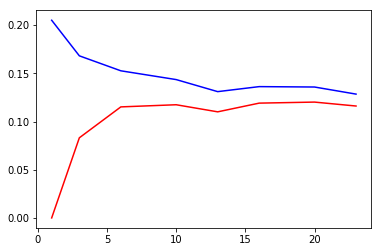

In [190]:
ks = [1, 3, 6, 10, 13, 16, 20, 23]
results_for_k = [try_k(k) for k in ks]
plt.plot(ks, [r[0] for r in results_for_k], color="r")
plt.plot(ks, [r[1] for r in results_for_k], color="b")

In [195]:
print(try_k(16))
print(try_k(23))

16
(0.11909769165289674, 0.13622291021671828)
23
(0.11609333533623756, 0.12845376482271165)


Красная линия, это ошибка на обучающей выборке. Синяя линия, это ошибка на тестовой выборке. Как возрастает k, так ошибки сходятся. У нас локальный минимум ошибки на обучающей выборке когда k=13, на промежутке от 20 до 23 снова начинают убывать. А на тестовой выборке, локальный минимум k=23. Поэтому, посмотрим что будет дальше (это длиться очень долго :( я добавил принты чтобы знать сколько ёще осталось).

25
30
35
40
45


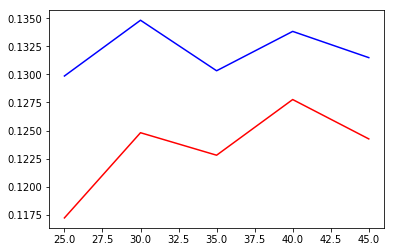

In [192]:
ks = [25, 30, 35, 40, 45]
results_for_k = [try_k(k) for k in ks]
plt.plot(ks, [r[0] for r in results_for_k], color="r")
plt.plot(ks, [r[1] for r in results_for_k], color="b")

In [193]:
results_for_k

[(0.11721996895498477, 0.1298557158712541),
 (0.12480596865454907, 0.1348209591681757),
 (0.12280306444344302, 0.13032303288743496),
 (0.12776025236593058, 0.1338279105087914),
 (0.12425516999649489, 0.1314913254278871)]

Попробуем найти лучший k, около локального минимума которого мы уже нашли, используя перекрестную проверку (это тоже потребует времени, но надеюсь меньше). Могли бы также искать лучше k, около 16, но вряд ли разница будет значительной.

In [198]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [22, 23, 24]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.13164087927494872 23


In [199]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.11609333533623754 0.12845376482271162


Для k=23, наименьшая ошибка на тестовой выборке.